In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση του dataset
df = pd.read_csv(r"C:\Users\Vassilis\train_encoded.csv", encoding='utf-8')

# έλεγχος
print("Αρχικό μέγεθος:", df.shape)


# Προεπισκόπηση
df[["movie_title", "audience_rating", "tomatometer_rating", "divergence_signed", "divergence_abs", "runtime"]].head()

Αρχικό μέγεθος: (12164, 56)


,movie_title,audience_rating,tomatometer_rating,divergence_signed,divergence_abs,runtime
0,Cypher,65.0,58.0,7.0,7.0,90.0
1,Traded,31.0,40.0,-9.0,9.0,98.0
2,Return to Nuke 'Em High,55.0,57.0,-2.0,2.0,85.0
3,Men with Brooms,67.0,55.0,12.0,12.0,102.0
4,Pete's Dragon,60.0,54.0,6.0,6.0,134.0


In [2]:
import os
FIG_DIR = r"C:Desktop\figures"
os.makedirs(FIG_DIR, exist_ok=True)

def save_fig(name, dpi=150, bbox_inches="tight"):
    path = os.path.join(FIG_DIR, f"{name}.png")
    plt.savefig(path, dpi=dpi, bbox_inches=bbox_inches)
    print("Saved:", path)


In [3]:
# === 4.1.1 Περιγραφικά στατιστικά για την απόκλιση ===
print("Descriptive stats for divergence_signed:")
print(df["divergence_signed"].describe(percentiles=[.25,.5,.75]))
print("\nDescriptive stats for divergence_abs:")
print(df["divergence_abs"].describe(percentiles=[.25,.5,.75]))


Descriptive stats for divergence_signed:
count    12164.000000
mean         0.737833
std         21.403641
min        -82.000000
25%        -14.000000
50%         -2.000000
75%         14.000000
max         95.000000
Name: divergence_signed, dtype: float64

Descriptive stats for divergence_abs:
count    12164.000000
mean        16.753782
std         13.339715
min          0.000000
25%          6.000000
50%         14.000000
75%         24.000000
max         95.000000
Name: divergence_abs, dtype: float64


Saved: C:Desktop\figures\table_descriptives_divergences.png


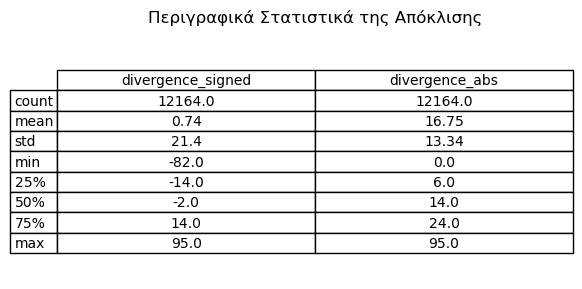

In [4]:
# Υπολογισμός descriptive stats για τις δύο μεταβλητές ενδιαφέροντος
desc_signed = df["divergence_signed"].describe(percentiles=[.25,.5,.75])
desc_abs    = df["divergence_abs"].describe(percentiles=[.25,.5,.75])

# Ενοποίηση σε DataFrame για καθαρή παρουσίαση
desc_df = pd.DataFrame({
    "divergence_signed": desc_signed,
    "divergence_abs": desc_abs
}).round(2)

# Οπτικοποίηση ως figure-πίνακας
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis("off")
tbl = ax.table(cellText=desc_df.values,
               rowLabels=desc_df.index,
               colLabels=desc_df.columns,
               cellLoc="center",
               loc="center")

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)
plt.title("Περιγραφικά Στατιστικά της Απόκλισης", pad=16)
plt.tight_layout()

# Προαιρετική αποθήκευση αν έχεις ορίσει save_fig
if "save_fig" in globals():
    save_fig("table_descriptives_divergences")
plt.show()


Saved: C:Desktop\figures\hist_divergence_signed_seaborn.png


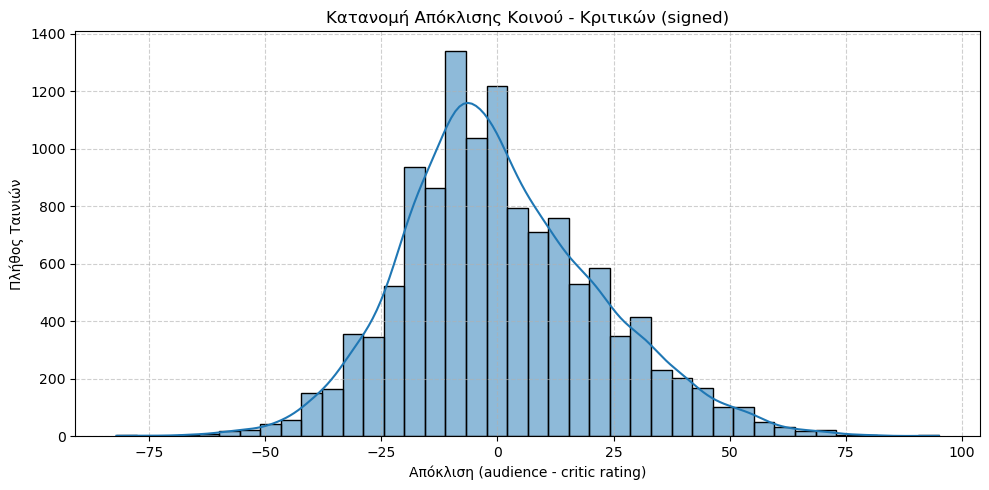

Saved: C:Desktop\figures\hist_divergence_abs_seaborn.png


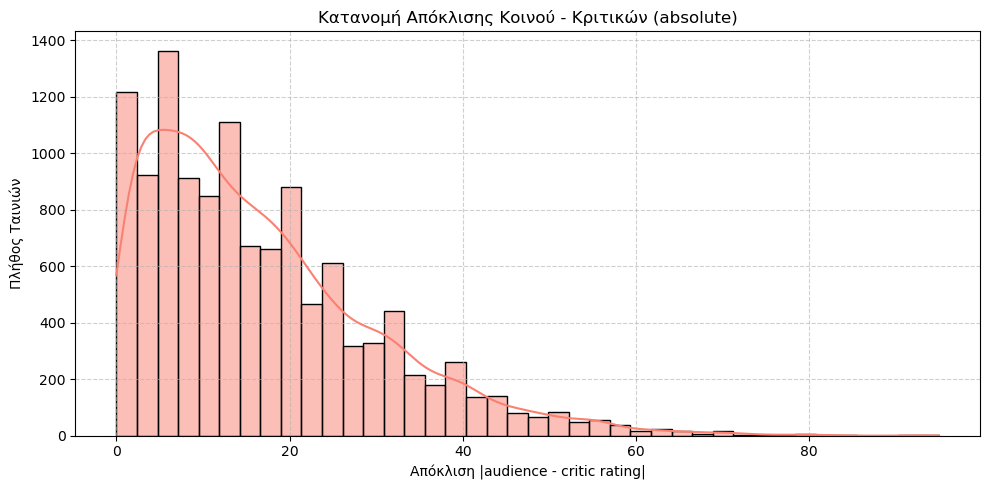

In [5]:
import seaborn as sns

# === Ιστόγραμμα signed απόκλισης ===
plt.figure(figsize=(10,5))
sns.histplot(df["divergence_signed"], bins=40, kde=True)
plt.title("Κατανομή Απόκλισης Κοινού - Κριτικών (signed)")
plt.xlabel("Απόκλιση (audience - critic rating)")
plt.ylabel("Πλήθος Ταινιών")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("hist_divergence_signed_seaborn")
plt.show()

# === Ιστόγραμμα absolute απόκλισης ===
plt.figure(figsize=(10,5))
sns.histplot(df["divergence_abs"], bins=40, kde=True, color="salmon")
plt.title("Κατανομή Απόκλισης Κοινού - Κριτικών (absolute)")
plt.xlabel("Απόκλιση |audience - critic rating|")
plt.ylabel("Πλήθος Ταινιών")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("hist_divergence_abs_seaborn")
plt.show()


In [6]:
# Υπολογισμός διάμεσου και IQR για την absolute απόκλιση
median_abs = df["divergence_abs"].median()
q1 = df["divergence_abs"].quantile(0.25)
q3 = df["divergence_abs"].quantile(0.75)
iqr_abs = q3 - q1

print("Διάμεσος (Median):", median_abs)
print("1ο Τεταρτημόριο (Q1):", q1)
print("3ο Τεταρτημόριο (Q3):", q3)
print("Ενδοτεταρτημοριακό εύρος (IQR):", iqr_abs)


Διάμεσος (Median): 14.0
1ο Τεταρτημόριο (Q1): 6.0
3ο Τεταρτημόριο (Q3): 24.0
Ενδοτεταρτημοριακό εύρος (IQR): 18.0


Saved: C:Desktop\figures\boxplot_signed_vs_absolute_seaborn.png


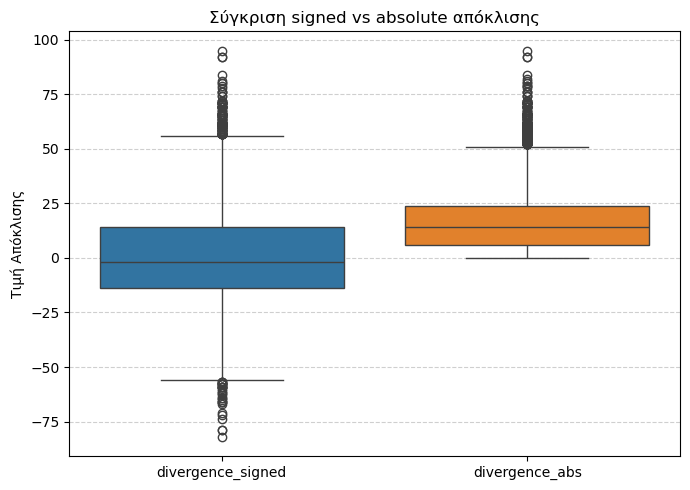

In [7]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df[["divergence_signed","divergence_abs"]])
plt.title("Σύγκριση signed vs absolute απόκλισης")
plt.ylabel("Τιμή Απόκλισης")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("boxplot_signed_vs_absolute_seaborn")
plt.show()


Saved: C:Desktop\figures\decade_median_abs.png.png


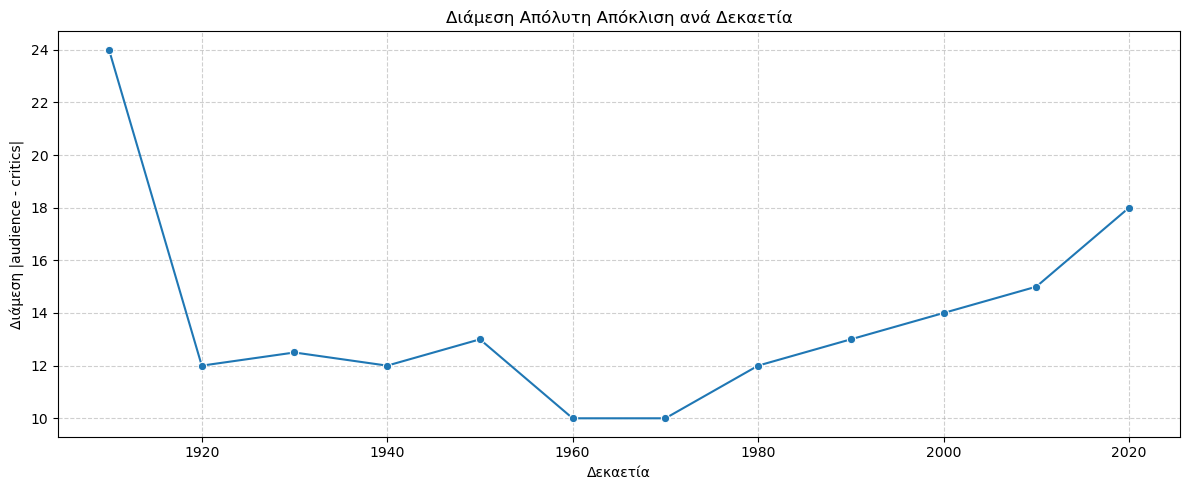

In [8]:
if "release_year" in df.columns:
    # Υπολογισμός δεκαετίας
    df["decade"] = (df["release_year"] // 10) * 10
    
    decade_median = df.groupby("decade")["divergence_abs"].median().dropna()
    
    plt.figure(figsize=(12,5))
    sns.lineplot(x=decade_median.index, y=decade_median.values, marker="o")
    plt.title("Διάμεση Απόλυτη Απόκλιση ανά Δεκαετία")
    plt.xlabel("Δεκαετία")
    plt.ylabel("Διάμεση |audience - critics|")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    save_fig("decade_median_abs.png")

    plt.show()


Saved: C:Desktop\figures\decade_median_abs_with_ols.png.png


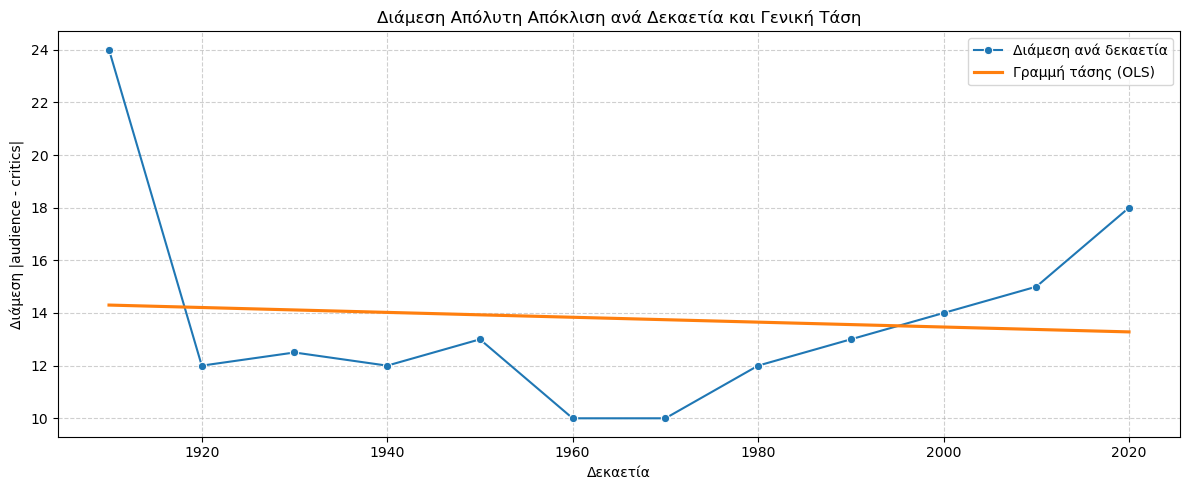

In [9]:
# 4.1.5 — Χρονική τάση ανά δεκαετία (διάμεση) + γραμμή παλινδρόμησης
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Βεβαιώσου ότι υπάρχει release_year (ακέραιος)
df_tmp = df.copy()
df_tmp = df_tmp[pd.notna(df_tmp["release_year"]) & pd.notna(df_tmp["divergence_abs"])].copy()
df_tmp["release_year"] = df_tmp["release_year"].astype(int)

# Υπολογισμός δεκαετίας και διάμεσης απόλυτης απόκλισης
df_tmp["decade"] = (df_tmp["release_year"] // 10) * 10
decades_df = (df_tmp.groupby("decade")["divergence_abs"]
              .median()
              .reset_index(name="median_divergence_abs"))

plt.figure(figsize=(12,5))

# 1) Πραγματικές τιμές: γραμμή διάμεσης ανά δεκαετία
sns.lineplot(data=decades_df, x="decade", y="median_divergence_abs", marker="o", label="Διάμεση ανά δεκαετία")

# 2) Γραμμή παλινδρόμησης πάνω στα decade-median σημεία (χωρίς scatter)
sns.regplot(data=decades_df, x="decade", y="median_divergence_abs",
            scatter=False, ci=None, label="Γραμμή τάσης (OLS)")

plt.title("Διάμεση Απόλυτη Απόκλιση ανά Δεκαετία και Γενική Τάση")
plt.xlabel("Δεκαετία")
plt.ylabel("Διάμεση |audience - critics|")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.legend()
save_fig("decade_median_abs_with_ols.png")
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\Vassilis\\anaconda3\\envs\\ptyxiakh\\lib\\site-packages\\matplotlib\\pyplot.py'>

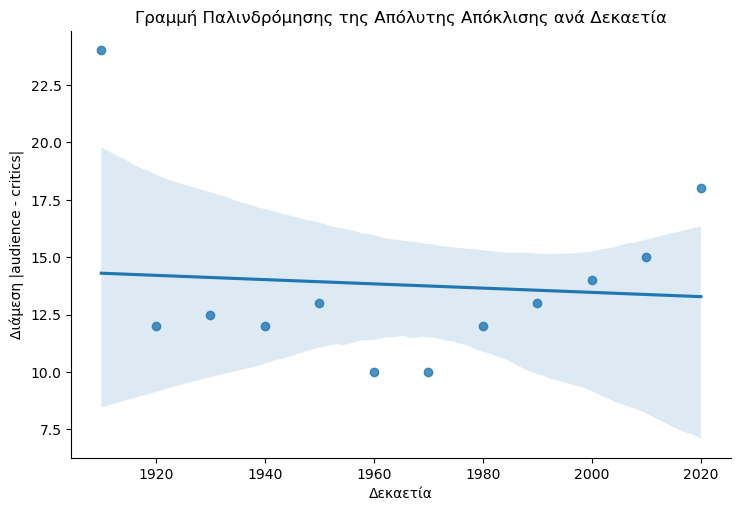

In [10]:
# Προετοιμασία δεδομένων ανά δεκαετία
df_tmp = df.copy()
df_tmp = df_tmp[pd.notna(df_tmp["release_year"]) & pd.notna(df_tmp["divergence_abs"])].copy()
df_tmp["release_year"] = df_tmp["release_year"].astype(int)
df_tmp["decade"] = (df_tmp["release_year"] // 10) * 10

decades_df = (df_tmp.groupby("decade")["divergence_abs"]
              .median()
              .reset_index(name="median_divergence_abs"))

# Γράφημα με lmplot (γραμμή παλινδρόμησης πάνω στις διάμεσες δεκαετιών)
sns.lmplot(
    x="decade", 
    y="median_divergence_abs", 
    data=decades_df, 
    fit_reg=True, 
    scatter=True,  # μπορείς να το κάνεις False αν θες μόνο τη γραμμή
    height=5, 
    aspect=1.5
)

plt.title("Γραμμή Παλινδρόμησης της Απόλυτης Απόκλισης ανά Δεκαετία")
plt.xlabel("Δεκαετία")
plt.ylabel("Διάμεση |audience - critics|")
plt



Saved: C:Desktop\figures\boxplot_signed_vs_absolute_seaborn.png


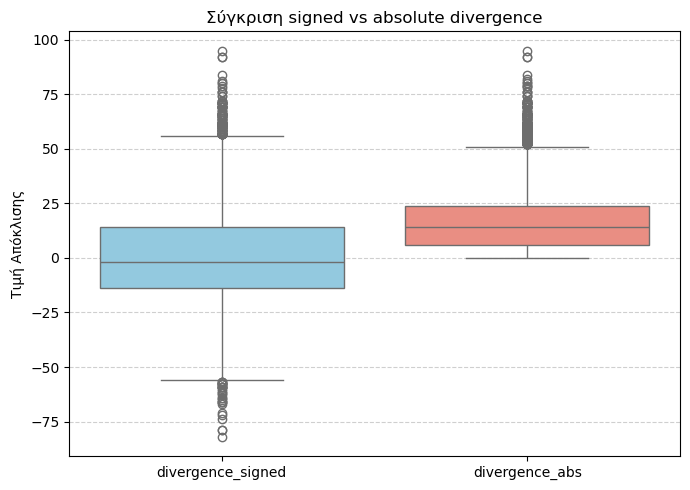

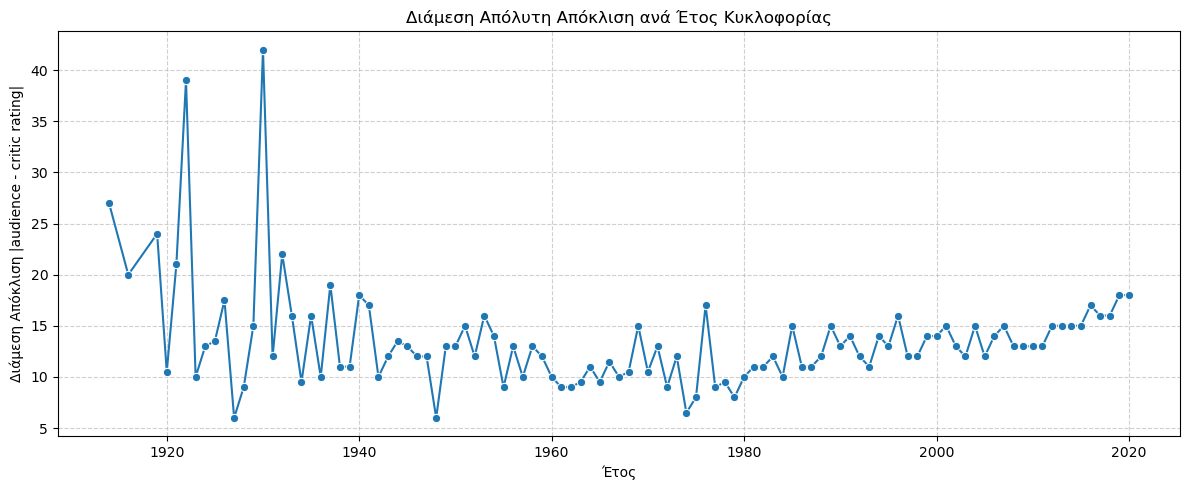

In [11]:
# === Boxplot signed vs absolute ===
plt.figure(figsize=(7,5))
sns.boxplot(data=df[["divergence_signed","divergence_abs"]], palette=["skyblue","salmon"])
plt.title("Σύγκριση signed vs absolute divergence")
plt.ylabel("Τιμή Απόκλισης")
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("boxplot_signed_vs_absolute_seaborn")
plt.show()

# === Χρονική εξέλιξη διάμεσης absolute divergence ===
if "release_year" in df.columns:
    yearly = df.groupby("release_year")["divergence_abs"].median().dropna()
    plt.figure(figsize=(12,5))
    sns.lineplot(x=yearly.index, y=yearly.values, marker="o")
    plt.title("Διάμεση Απόλυτη Απόκλιση ανά Έτος Κυκλοφορίας")
    plt.xlabel("Έτος")
    plt.ylabel("Διάμεση Απόκλιση |audience - critic rating|")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    #save_fig("median_abs_divergence_by_year_seaborn")
    plt.show()


In [12]:
# Υπολογισμός πλήθους ταινιών ανά δεκαετία
decade_counts = df.groupby("decade")["movie_title"].count().reset_index()
decade_counts.columns = ["Decade", "Count"]

print(decade_counts)


    Decade  Count
0     1910      3
1     1920     34
2     1930    150
3     1940    242
4     1950    347
5     1960    443
6     1970    534
7     1980    936
8     1990   1529
9     2000   3003
10    2010   4704
11    2020    239


Saved: C:Desktop\figures\decade_median_abs_recent.png.png


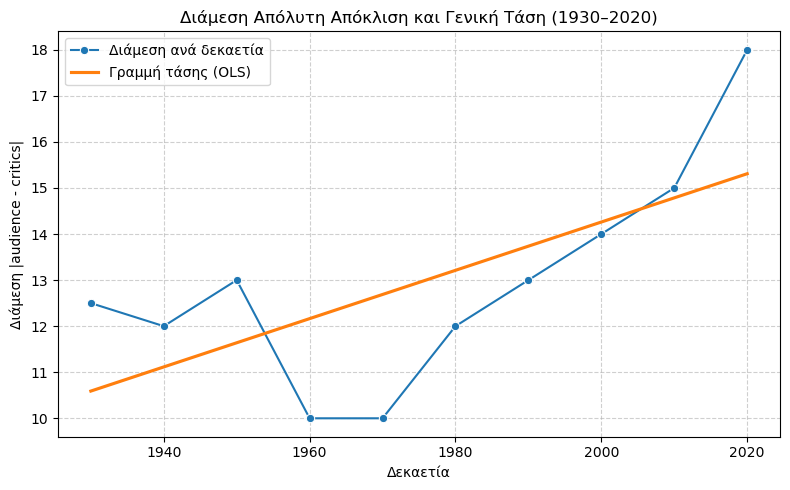

In [13]:
plt.figure(figsize=(8,5))

# Φιλτράρουμε μόνο δεκαετίες >= 1930
recent_decades_df = decades_df[decades_df["decade"] >= 1930]

# 1) Πραγματικές τιμές
sns.lineplot(data=recent_decades_df, x="decade", y="median_divergence_abs", marker="o", label="Διάμεση ανά δεκαετία")

# 2) Γραμμή παλινδρόμησης
sns.regplot(data=recent_decades_df, x="decade", y="median_divergence_abs",
            scatter=False, ci=None, label="Γραμμή τάσης (OLS)")

plt.title("Διάμεση Απόλυτη Απόκλιση και Γενική Τάση (1930–2020)")
plt.xlabel("Δεκαετία")
plt.ylabel("Διάμεση |audience - critics|")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.legend()
save_fig("decade_median_abs_recent.png")
plt.show()


In [14]:
# Ταξινόμηση με βάση την absolute απόκλιση
top10_divergent = df.sort_values("divergence_abs", ascending=False).head(10)

# Επιλέγουμε μερικές στήλες για παρουσίαση
top10_table = top10_divergent[["movie_title", "release_year", "genres", 
                               "tomatometer_rating", "audience_rating", 
                               "divergence_signed", "divergence_abs", "audience_count", "tomatometer_count"]]

top10_table




,movie_title,release_year,genres,tomatometer_rating,audience_rating,divergence_signed,divergence_abs,audience_count,tomatometer_count
10225,96 Souls,2017,"Drama, Science Fiction & Fantasy",0.0,95.0,95.0,95.0,140.0,6.0
972,Is That a Gun in Your Pocket?,2016,Comedy,0.0,92.0,92.0,92.0,379.0,11.0
9676,Hating Breitbart,2012,"Documentary, Special Interest",0.0,92.0,92.0,92.0,804.0,9.0
4474,Fall,1997,"Comedy, Drama, Romance",0.0,84.0,84.0,84.0,1118.0,7.0
699,Vengeance Valley,1951,"Action & Adventure, Classics, Western",100.0,18.0,-82.0,82.0,915.0,5.0
5151,The Music of Silence,2018,Drama,0.0,81.0,81.0,81.0,115.0,17.0
10052,Sparkle,1976,"Drama, Musical & Performing Arts",10.0,90.0,80.0,80.0,4581.0,10.0
5087,All Relative,2014,"Comedy, Drama, Romance",10.0,90.0,80.0,80.0,866.0,10.0
9554,Rainbow Brite and the Star Stealer,1985,"Animation, Drama, Kids & Family",0.0,79.0,79.0,79.0,6009.0,7.0
10224,Knock Down the House,2019,Documentary,99.0,20.0,-79.0,79.0,2905.0,103.0


Saved: C:Desktop\figures\top10_divergent_movies_signed_strongcolors.png


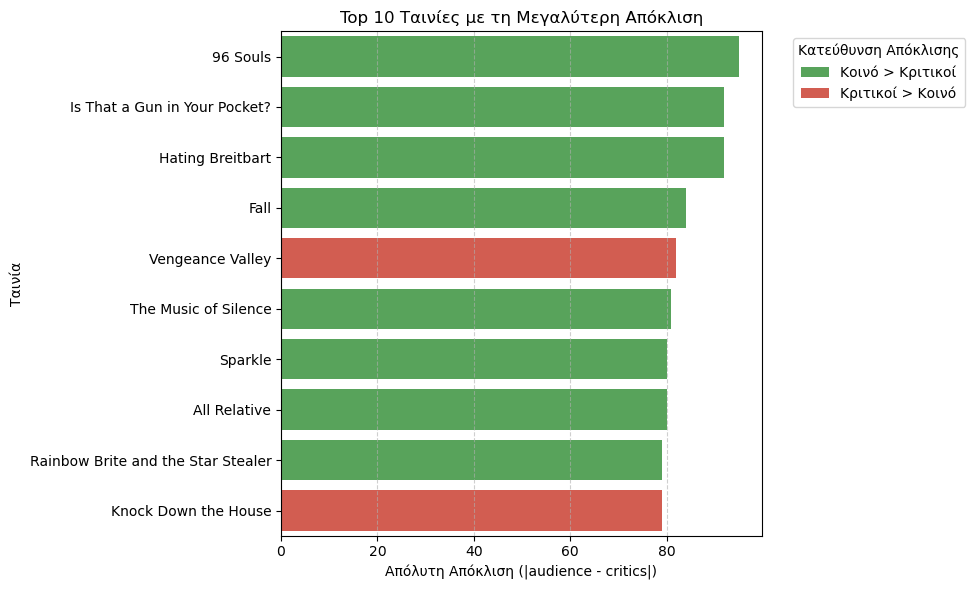

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Κατηγορική στήλη για την κατεύθυνση της απόκλισης
tmp = top10_divergent.copy()
tmp["direction"] = np.where(
    tmp["divergence_signed"] >= 0,
    "Κοινό > Κριτικοί",      # θετική signed: το κοινό πιο ψηλά
    "Κριτικοί > Κοινό"       # αρνητική signed: οι κριτικοί πιο ψηλά
)

# 2) Ταξινόμηση (φθίνουσα απόκλιση)
tmp = tmp.sort_values("divergence_abs", ascending=False)

# 3) Bar plot με πιο έντονα χρώματα
plt.figure(figsize=(10,6))
sns.barplot(
    data=tmp,
    x="divergence_abs",
    y="movie_title",
    hue="direction",
    dodge=False,
    palette={"Κοινό > Κριτικοί":"#4CAF50", "Κριτικοί > Κοινό":"#E74C3C"}
)

plt.title("Top 10 Ταινίες με τη Μεγαλύτερη Απόκλιση")
plt.xlabel("Απόλυτη Απόκλιση (|audience - critics|)")
plt.ylabel("Ταινία")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)

# 4) Legend έξω δεξιά
plt.legend(
    title="Κατεύθυνση Απόκλισης",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
save_fig("top10_divergent_movies_signed_strongcolors")
plt.show()


In [16]:
# Φίλτρο αξιοπιστίας: τουλάχιστον 30 κριτικές κριτικών
filtered_df = df[df["tomatometer_count"] >= 30].copy()

top10_divergent_filt = (
    filtered_df
    .sort_values("divergence_abs", ascending=False)
    .head(10)
    .copy()
)

top10_table_filt = top10_divergent_filt[[
    "movie_title", "release_year", "genres",
    "tomatometer_rating", "audience_rating",
    "divergence_signed", "divergence_abs",
    "audience_count", "tomatometer_count"
]]

top10_table_filt
# (προαιρετικά)
# top10_table_filt.to_csv(os.path.join(FIG_DIR, "top10_divergent_filtered.csv"), index=False)


,movie_title,release_year,genres,tomatometer_rating,audience_rating,divergence_signed,divergence_abs,audience_count,tomatometer_count
10224,Knock Down the House,2019,Documentary,99.0,20.0,-79.0,79.0,2905.0,103.0
1909,Never Rarely Sometimes Always,2020,Drama,99.0,20.0,-79.0,79.0,750.0,195.0
1723,Stonewall,2015,Drama,9.0,85.0,76.0,76.0,3200.0,75.0
11069,Out Cold,2001,Comedy,8.0,84.0,76.0,76.0,47249.0,49.0
6909,Grind,2003,"Action & Adventure, Comedy",8.0,79.0,71.0,71.0,52894.0,74.0
5537,Diary of a Mad Black Woman,2005,Comedy,16.0,87.0,71.0,71.0,89161.0,115.0
1783,Madea's Family Reunion,2006,"Comedy, Drama",26.0,94.0,68.0,68.0,40204.0,58.0
1535,Madea Goes to Jail,2009,"Comedy, Drama",29.0,96.0,67.0,67.0,44763.0,52.0
6792,Drop Dead Fred,1991,Comedy,11.0,77.0,66.0,66.0,198519.0,36.0
2561,The Life of David Gale,2003,"Drama, Mystery & Suspense",19.0,81.0,62.0,62.0,60939.0,157.0


Saved: C:Desktop\figures\top10_divergent_movies_filtered.png


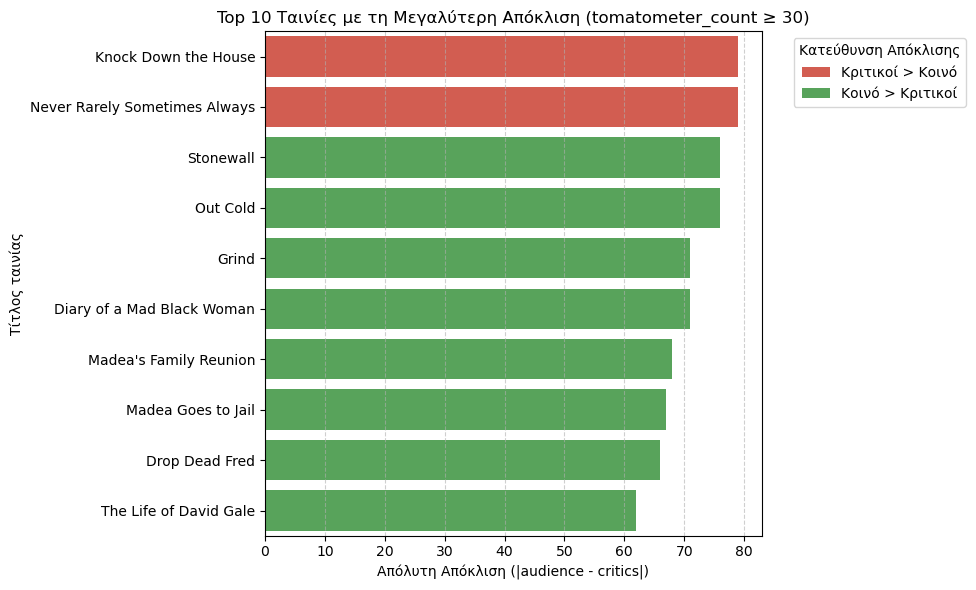

In [17]:
# Κατεύθυνση απόκλισης (για 2 χρώματα)
tmp_filt = top10_divergent_filt.copy()
tmp_filt["direction"] = np.where(
    tmp_filt["divergence_signed"] >= 0,
    "Κοινό > Κριτικοί",
    "Κριτικοί > Κοινό"
)
tmp_filt = tmp_filt.sort_values("divergence_abs", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    data=tmp_filt,
    x="divergence_abs",
    y="movie_title",
    hue="direction",
    dodge=False,
    palette={"Κοινό > Κριτικοί":"#4CAF50", "Κριτικοί > Κοινό":"#E74C3C"}
)

plt.title("Top 10 Ταινίες με τη Μεγαλύτερη Απόκλιση (tomatometer_count ≥ 30)")
plt.xlabel("Απόλυτη Απόκλιση (|audience - critics|)")
plt.ylabel("Τίτλος ταινίας")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)

# Legend έξω δεξιά
plt.legend(title="Κατεύθυνση Απόκλισης", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
if "save_fig" in globals():
    save_fig("top10_divergent_movies_filtered")
plt.show()


In [22]:
import pandas as pd
import numpy as np

print("Σχήμα:", df.shape)
print("\nΠρώτες στήλες:", list(df.columns)[:12], "...")
print("\nΈλεγχος ύπαρξης στηλών απόκλισης:")
needed = ["divergence_signed", "divergence_abs"]
for c in needed:
    print(f" - {c}:", "OK" if c in df.columns else "ΔΕΝ ΒΡΕΘΗΚΕ")

# Γρήγορη περίληψη για τις δύο αποκλίσεις (αν υπάρχουν)
for c in needed:
    if c in df.columns:
        s = pd.to_numeric(df[c], errors="coerce")
        print(f"\n{c} περιγραφικά:")
        print(s.describe(percentiles=[0.05,0.25,0.5,0.75,0.95]).to_string())
        print("NaNs:", s.isna().sum())
        
# Λίστα πιθανών αριθμητικών στηλών (ΧΩΡΙΣ αλλαγή ονομάτων ή δημιουργία νέων)
# Δεν τροποποιώ το df — φτιάχνω μόνο μια λίστα με όσες στήλες μπορούν να γίνουν αριθμητικές.
numeric_cols = []
for col in df.columns:
    # απόπειρα μετατροπής για έλεγχο (δεν γράφω πίσω στο df)
    ser = pd.to_numeric(df[col], errors="coerce")
    # κριτήριο: να έχει τουλάχιστον 10 μη-NaN αριθμητικές τιμές
    if ser.notna().sum() >= 10:
        # προτιμάμε στήλες που μοιάζουν πραγματικά αριθμητικές (>= 80% numeric μετά το coerce)
        if ser.notna().mean() >= 0.8:
            numeric_cols.append(col)

print("\nΥποψήφιες αριθμητικές στήλες (δεν άλλαξα τίποτα στο df):")
print(numeric_cols[:40], "..." if len(numeric_cols) > 40 else "")

Σχήμα: (12164, 57)

Πρώτες στήλες: ['movie_title', 'directors', 'authors', 'release_year', 'genres', 'content_rating', 'runtime', 'production_company', 'tomatometer_status', 'audience_status', 'tomatometer_rating', 'audience_rating'] ...

Έλεγχος ύπαρξης στηλών απόκλισης:
 - divergence_signed: OK
 - divergence_abs: OK

divergence_signed περιγραφικά:
count    12164.000000
mean         0.737833
std         21.403641
min        -82.000000
5%         -31.000000
25%        -14.000000
50%         -2.000000
75%         14.000000
95%         39.000000
max         95.000000
NaNs: 0

divergence_abs περιγραφικά:
count    12164.000000
mean        16.753782
std         13.339715
min          0.000000
5%           1.000000
25%          6.000000
50%         14.000000
75%         24.000000
95%         43.000000
max         95.000000
NaNs: 0

Υποψήφιες αριθμητικές στήλες (δεν άλλαξα τίποτα στο df):
['release_year', 'runtime', 'tomatometer_rating', 'audience_rating', 'divergence_signed', 'divergence_abs

In [23]:
# ΒΗΜΑ 2 — Συσχετίσεις (Pearson & Spearman) με divergence_signed και divergence_abs
from scipy import stats

targets = ["divergence_signed", "divergence_abs"]
features = [c for c in numeric_cols if c not in targets]

def corr_table(df, target, method="pearson"):
    rows = []
    for col in features:
        x = pd.to_numeric(df[target], errors="coerce")
        y = pd.to_numeric(df[col], errors="coerce")
        mask = x.notna() & y.notna()
        if mask.sum() < 30:
            continue
        if method == "pearson":
            r, p = stats.pearsonr(x[mask], y[mask])
        else:
            r, p = stats.spearmanr(x[mask], y[mask])
        rows.append({
            "feature": col,
            "r": r,
            "p_value": p,
            "n": mask.sum()
        })
    out = pd.DataFrame(rows).sort_values("r", key=lambda x: x.abs(), ascending=False)
    return out

# Δημιουργία πινάκων για κάθε target
corr_results = {}
for t in targets:
    corr_results[(t,"pearson")]  = corr_table(df, t, "pearson")
    corr_results[(t,"spearman")] = corr_table(df, t, "spearman")

# Εμφάνιση κορυφαίων 10 για αρχή
for t in targets:
    print("\n============================")
    print(f"Συσχετίσεις με {t} (Pearson)")
    print(corr_results[(t,"pearson")].head(10).to_string(index=False))

    print("\nΣυσχετίσεις με {t} (Spearman)")
    print(corr_results[(t,"spearman")].head(10).to_string(index=False))



Συσχετίσεις με divergence_signed (Pearson)
                         feature         r       p_value     n
              tomatometer_rating -0.696846  0.000000e+00 12164
      tomatometer_status_encoded -0.597820  0.000000e+00 12164
tomatometer_rotten_critics_count  0.322064 1.400826e-291 12164
directors_divergence_signed_mean  0.320931 1.965070e-289 12164
  authors_divergence_signed_mean  0.303724 5.959236e-258 12164
          content_rating_encoded  0.194586 4.280509e-104 12164
 tomatometer_fresh_critics_count -0.185666  8.825666e-95 12164
                        Classics -0.123607  1.269854e-42 12164
     authors_divergence_abs_mean  0.121696  2.330156e-41 12164
   directors_divergence_abs_mean  0.114320  1.139127e-36 12164

Συσχετίσεις με {t} (Spearman)
                         feature         r       p_value     n
              tomatometer_rating -0.689219  0.000000e+00 12164
      tomatometer_status_encoded -0.610152  0.000000e+00 12164
tomatometer_rotten_critics_count  0.427520 

Saved: C:Desktop\figures\correlation_heatmap2.png


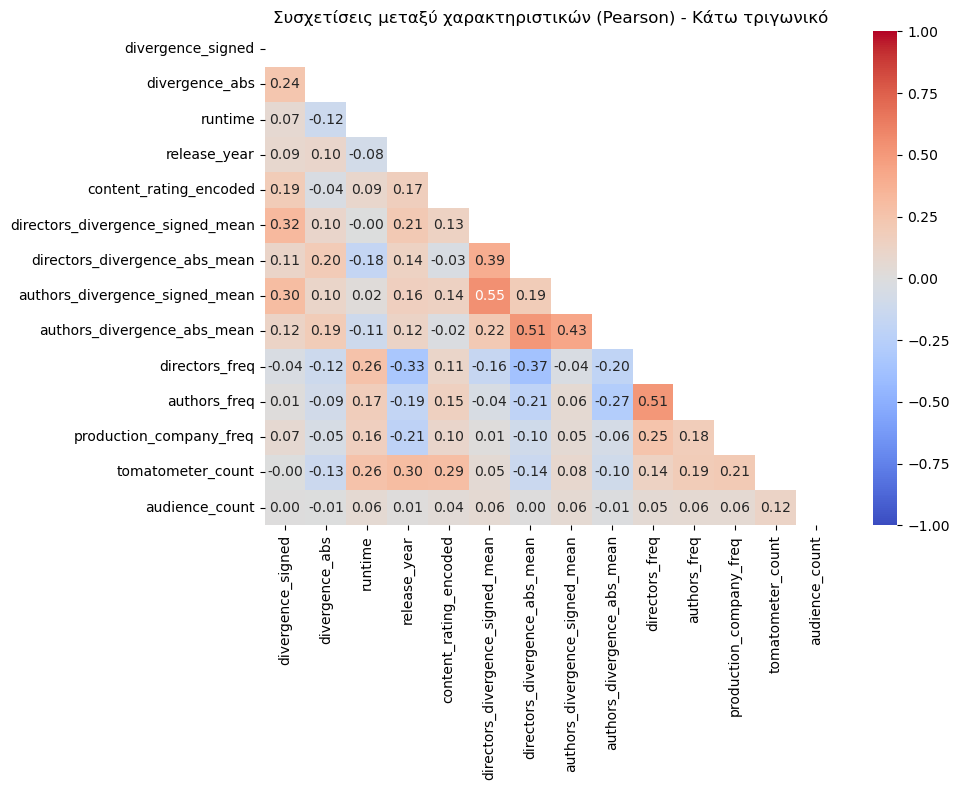


Συσχετίσεις με divergence_signed

  Pearson:
    directors_divergence_signed_mean r= 0.321  p=2.0e-289  n=12164
    authors_divergence_signed_mean r= 0.304  p=6.0e-258  n=12164
    authors_divergence_abs_mean    r= 0.122  p=2.3e-41  n=12164
    directors_divergence_abs_mean  r= 0.114  p=1.1e-36  n=12164
    release_year                   r= 0.086  p=2.5e-21  n=12164
    production_company_freq        r= 0.070  p=8.4e-15  n=12164
    runtime                        r= 0.069  p=2.0e-14  n=12164
    directors_freq                 r=-0.035  p=9.9e-05  n=12164
    authors_freq                   r= 0.015  p=9.9e-02  n=12164
    audience_count                 r= 0.005  p=6.0e-01  n=12164

  Spearman:
    directors_divergence_signed_mean r= 0.317  p=9.5e-282  n=12164
    authors_divergence_signed_mean r= 0.306  p=1.5e-261  n=12164
    audience_count                 r= 0.220  p=8.8e-133  n=12164
    production_company_freq        r= 0.094  p=2.2e-25  n=12164
    runtime                        r

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

corr = df[[
    "divergence_signed", "divergence_abs", "runtime", "release_year",
    "content_rating_encoded", "directors_divergence_signed_mean", "directors_divergence_abs_mean",
    "authors_divergence_signed_mean", "authors_divergence_abs_mean",
    "directors_freq", "authors_freq", "production_company_freq",
    "tomatometer_count", "audience_count"
]].corr(method="pearson")

# Μάσκα για να κρύψουμε το πάνω τρίγωνο
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Συσχετίσεις μεταξύ χαρακτηριστικών (Pearson) - Κάτω τριγωνικό")
plt.tight_layout()
save_fig ("correlation_heatmap2")
plt.show()


# 2) Υπολογισμός Pearson & Spearman για divergence_signed και divergence_abs
targets = ["divergence_signed", "divergence_abs"]
features = [c for c in cols_to_plot if c not in targets]

def corr_report(x, y, method="pearson"):
    mask = x.notna() & y.notna()
    if mask.sum() < 30:
        return None
    if method == "pearson":
        r, p = stats.pearsonr(x[mask], y[mask])
    else:
        r, p = stats.spearmanr(x[mask], y[mask])
    return r, p, mask.sum()

for target in targets:
    print("\n============================")
    print(f"Συσχετίσεις με {target}")
    for method in ["pearson", "spearman"]:
        print(f"\n  {method.capitalize()}:")
        results = []
        for f in features:
            r, p, n = corr_report(df[target], df[f], method)
            results.append((f, r, p, n))
        # ταξινόμηση κατά |r|
        results = sorted(results, key=lambda x: abs(x[1]), reverse=True)
        for f, r, p, n in results[:10]:
            print(f"    {f:30s} r={r:6.3f}  p={p:.1e}  n={n}")


In [37]:
check_df = (
    df.groupby("runtime_bucket")["divergence_abs"]
    .agg(["median", "mean", "count", "min", "max"])
    .reset_index()
)
print(check_df)


  runtime_bucket  median       mean  count  min   max
0          70–89    16.0  18.427738   2228  0.0  92.0
1         90–109    14.0  17.403575   6378  0.0  92.0
2        110–129    12.0  15.100495   2627  0.0  95.0
3           130+    10.0  12.961332    931  0.0  81.0


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\335250214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("runtime_bucket")["divergence_abs"]


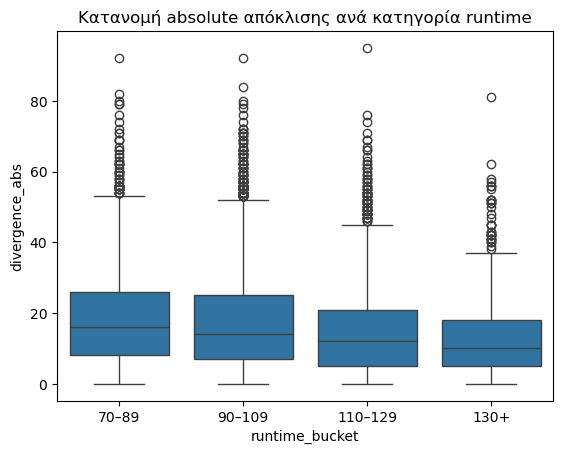

In [39]:
sns.boxplot(data=df, x="runtime_bucket", y="divergence_abs")
plt.title("Κατανομή absolute απόκλισης ανά κατηγορία runtime")
plt.show()


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\698726368.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("runtime_bucket")["divergence_abs"]


Saved: C:Desktop\figures\runtime_median_abs.png.png


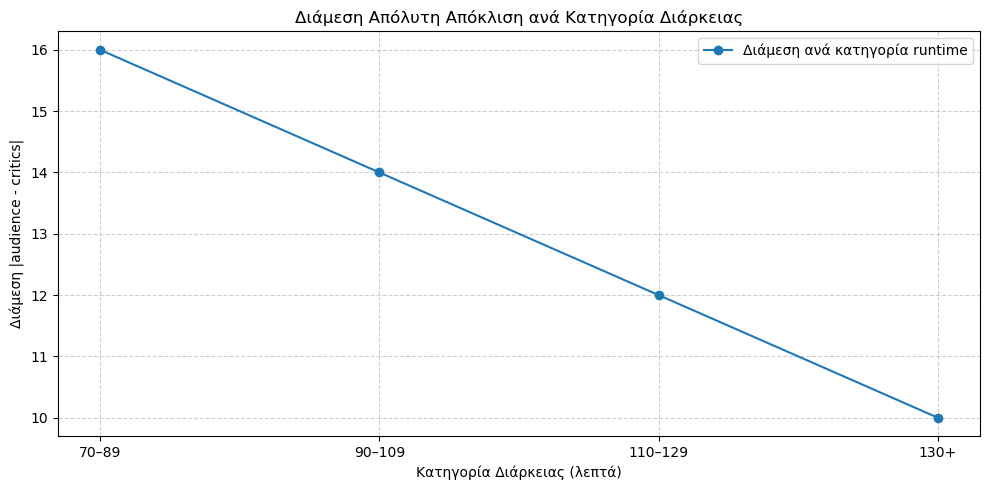

In [40]:
# Δημιουργία buckets για runtime
bins = [70, 90, 110, 130, 1000]
labels = ["70–89", "90–109", "110–129", "130+"]
df["runtime_bucket"] = pd.cut(df["runtime"], bins=bins, labels=labels, right=False)

# Υπολογισμός διάμεσης absolute απόκλισης ανά bucket
runtime_df = (
    df.groupby("runtime_bucket")["divergence_abs"]
    .median()
    .reset_index(name="median_divergence_abs")
)

plt.figure(figsize=(10,5))

# Γραμμή/σημεία για διαμέσους
plt.plot(runtime_df["runtime_bucket"], runtime_df["median_divergence_abs"],
         marker="o", linestyle="-", label="Διάμεση ανά κατηγορία runtime")

# Format
plt.title("Διάμεση Απόλυτη Απόκλιση ανά Κατηγορία Διάρκειας")
plt.xlabel("Κατηγορία Διάρκειας (λεπτά)")
plt.ylabel("Διάμεση |audience - critics|")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
save_fig("runtime_median_abs.png")
plt.show()


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\3551628255.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cr_df, x="content_rating", y="median_divergence_abs", palette="viridis")


Saved: C:Desktop\figures\content_rating_median_abs.png.png


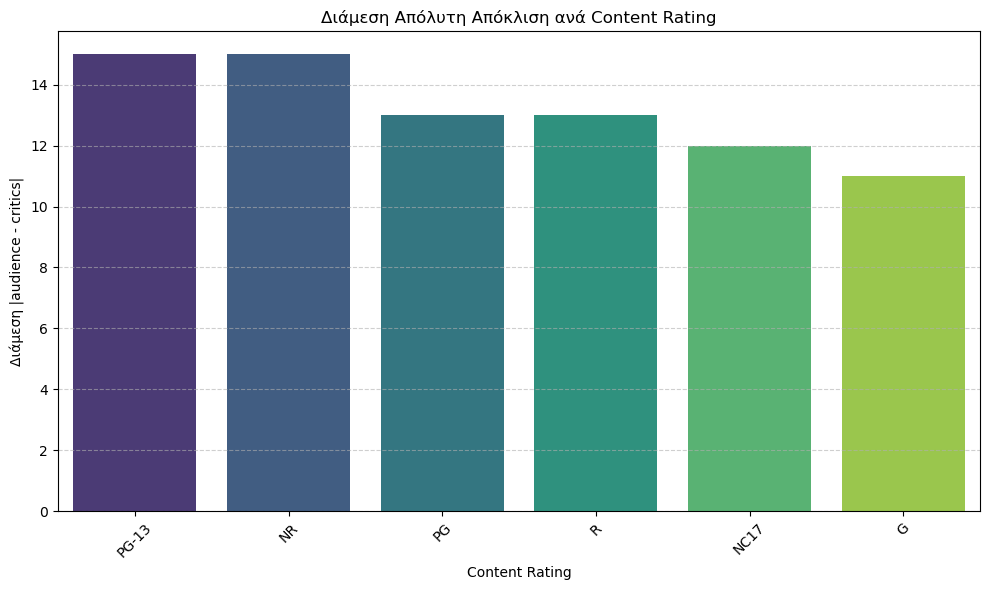

  content_rating  median_divergence_abs
4          PG-13                   15.0
2             NR                   15.0
3             PG                   13.0
5              R                   13.0
1           NC17                   12.0
0              G                   11.0


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Υπολογισμός διάμεσης absolute απόκλισης ανά content_rating
cr_df = (
    df.groupby("content_rating")["divergence_abs"]
    .median()
    .reset_index(name="median_divergence_abs")
    .sort_values("median_divergence_abs", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=cr_df, x="content_rating", y="median_divergence_abs", palette="viridis")

plt.title("Διάμεση Απόλυτη Απόκλιση ανά Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Διάμεση |audience - critics|")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", axis="y", alpha=0.6)
plt.tight_layout()
save_fig("content_rating_median_abs.png")
plt.show()

print(cr_df)


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\1539206040.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cr_abs, x="content_rating", y="median_abs", palette="viridis")


Saved: C:Desktop\figures\content_rating_median_abs.png.png


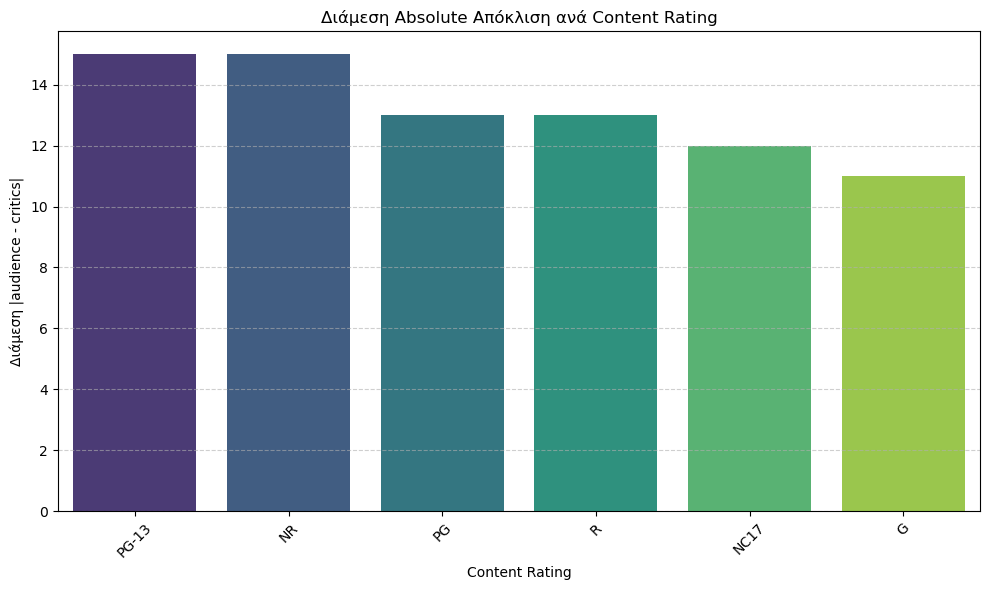

Median absolute divergence per content rating:
  content_rating  median_abs
4          PG-13        15.0
2             NR        15.0
3             PG        13.0
5              R        13.0
1           NC17        12.0
0              G        11.0


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\1539206040.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cr_signed, x="content_rating", y="mean_signed", palette="coolwarm")


Saved: C:Desktop\figures\content_rating_mean_signed.png.png


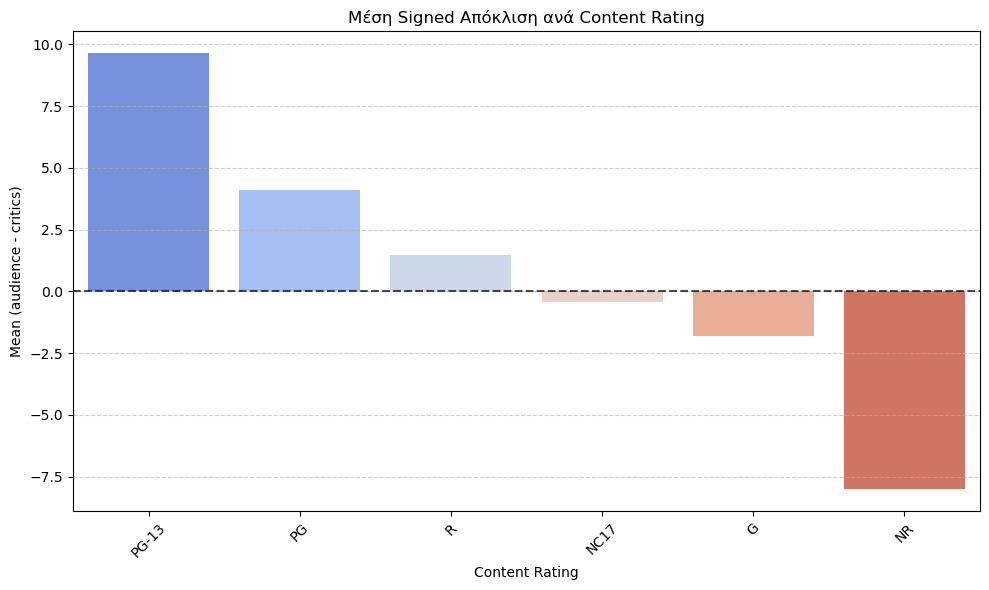

Mean signed divergence per content rating:
  content_rating  mean_signed
4          PG-13     9.639152
3             PG     4.084391
5              R     1.485046
1           NC17    -0.433333
0              G    -1.822034
2             NR    -8.013457


In [44]:
# 1) Median absolute divergence ανά content rating
cr_abs = (
    df.groupby("content_rating")["divergence_abs"]
    .median()
    .reset_index(name="median_abs")
    .sort_values("median_abs", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=cr_abs, x="content_rating", y="median_abs", palette="viridis")
plt.title("Διάμεση Absolute Απόκλιση ανά Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Διάμεση |audience - critics|")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("content_rating_median_abs.png")
plt.show()

print("Median absolute divergence per content rating:")
print(cr_abs)

# 2) Mean signed divergence ανά content rating
cr_signed = (
    df.groupby("content_rating")["divergence_signed"]
    .mean()
    .reset_index(name="mean_signed")
    .sort_values("mean_signed", ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=cr_signed, x="content_rating", y="mean_signed", palette="coolwarm")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Μέση Signed Απόκλιση ανά Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Mean (audience - critics)")
plt.xticks(rotation=45)
plt.grid(True, axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("content_rating_mean_signed.png")
plt.show()

print("Mean signed divergence per content rating:")
print(cr_signed)


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\1215166989.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_abs, x="median_abs", y="genre", palette="viridis")


Saved: C:Desktop\figures\genres_median_abs.png.png


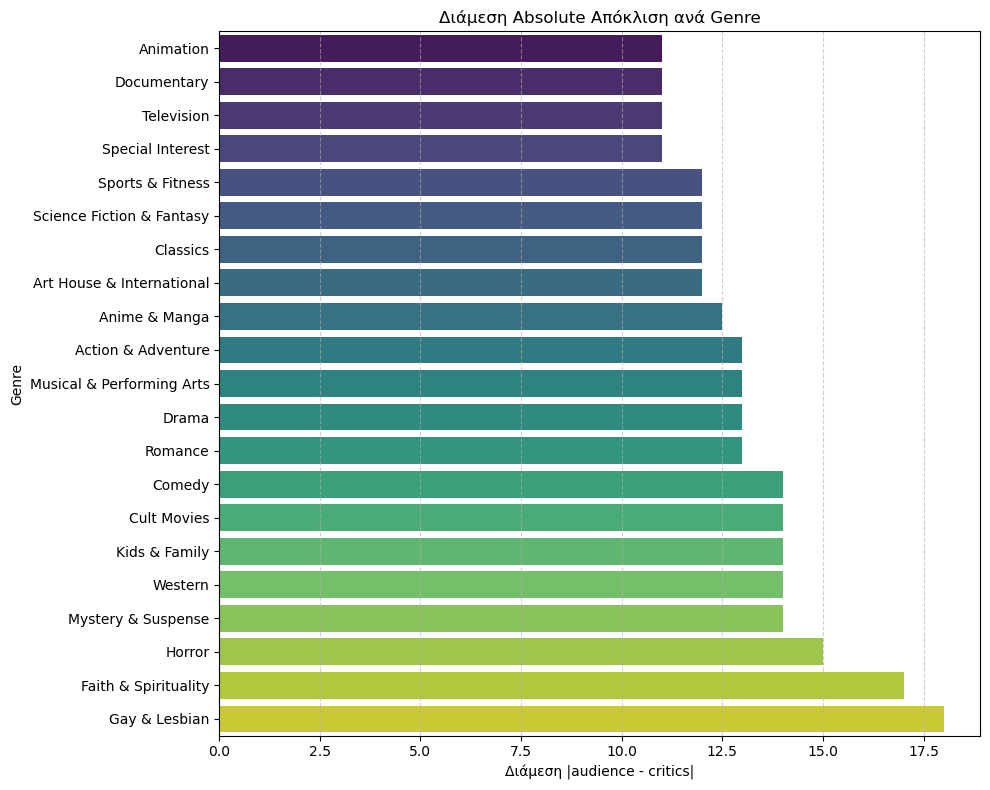

                        genre  median_abs
1                   Animation        11.0
7                 Documentary        11.0
19                 Television        11.0
17           Special Interest        11.0
18           Sports & Fitness        12.0
16  Science Fiction & Fantasy        12.0
4                    Classics        12.0
3   Art House & International        12.0
2               Anime & Manga        12.5
0          Action & Adventure        13.0
13  Musical & Performing Arts        13.0
8                       Drama        13.0
15                    Romance        13.0
5                      Comedy        14.0
6                 Cult Movies        14.0
12              Kids & Family        14.0
20                    Western        14.0
14         Mystery & Suspense        14.0
11                     Horror        15.0
9        Faith & Spirituality        17.0
10              Gay & Lesbian        18.0


In [45]:
# Υπολογισμός διάμεσης absolute απόκλισης ανά genre
genre_cols = ['Action & Adventure','Animation','Anime & Manga','Art House & International',
              'Classics','Comedy','Cult Movies','Documentary','Drama','Faith & Spirituality',
              'Gay & Lesbian','Horror','Kids & Family','Musical & Performing Arts',
              'Mystery & Suspense','Romance','Science Fiction & Fantasy','Special Interest',
              'Sports & Fitness','Television','Western']

genre_abs = []
for g in genre_cols:
    median_val = df.loc[df[g] == 1, "divergence_abs"].median()
    genre_abs.append((g, median_val))

genre_abs = pd.DataFrame(genre_abs, columns=["genre", "median_abs"]).dropna()
genre_abs = genre_abs.sort_values("median_abs", ascending=True)

plt.figure(figsize=(10,8))
sns.barplot(data=genre_abs, x="median_abs", y="genre", palette="viridis")
plt.title("Διάμεση Absolute Απόκλιση ανά Genre")
plt.xlabel("Διάμεση |audience - critics|")
plt.ylabel("Genre")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("genres_median_abs.png")
plt.show()

print(genre_abs)


C:\Users\Vassilis\AppData\Local\Temp\ipykernel_4760\588891152.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_signed, x="mean_signed", y="genre", palette="coolwarm")


Saved: C:Desktop\figures\genres_mean_signed.png.png


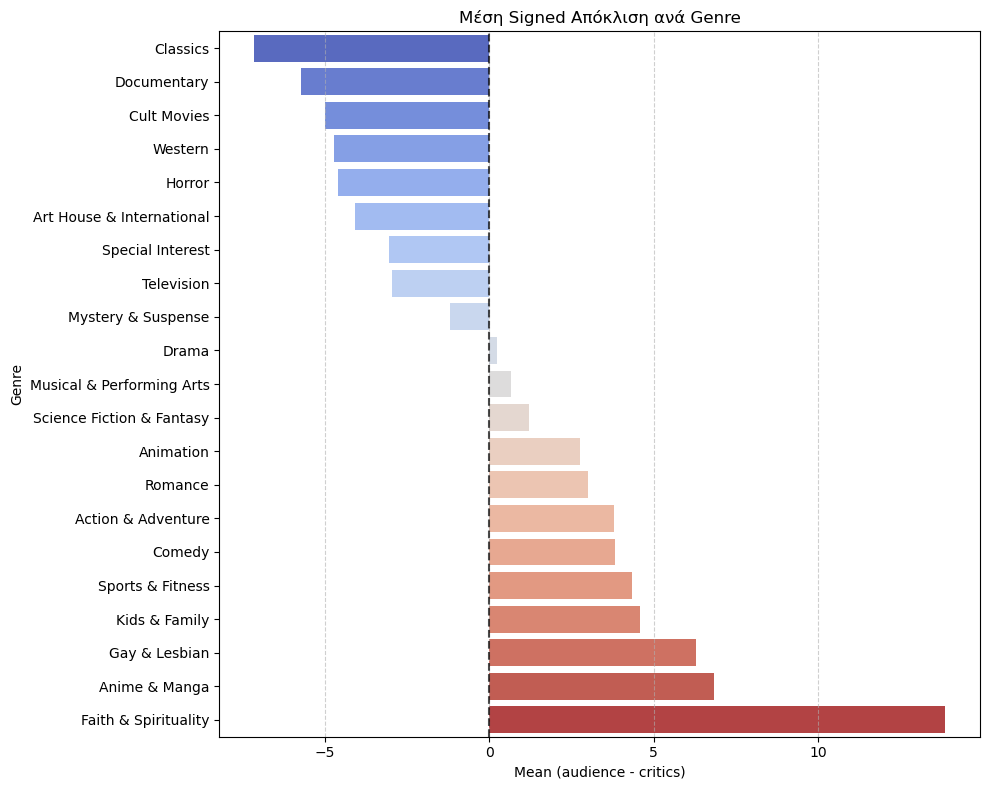

                        genre  mean_signed
4                    Classics    -7.160554
7                 Documentary    -5.713687
6                 Cult Movies    -4.986486
20                    Western    -4.731915
11                     Horror    -4.605281
3   Art House & International    -4.085882
17           Special Interest    -3.034221
19                 Television    -2.970803
14         Mystery & Suspense    -1.178984
8                       Drama     0.231528
13  Musical & Performing Arts     0.662478
16  Science Fiction & Fantasy     1.223443
1                   Animation     2.749398
15                    Romance     3.012640
0          Action & Adventure     3.807024
5                      Comedy     3.811244
18           Sports & Fitness     4.333333
12              Kids & Family     4.591371
10              Gay & Lesbian     6.298246
2               Anime & Manga     6.833333
9        Faith & Spirituality    13.875000


In [46]:
genre_signed = []
for g in genre_cols:
    mean_val = df.loc[df[g] == 1, "divergence_signed"].mean()
    genre_signed.append((g, mean_val))

genre_signed = pd.DataFrame(genre_signed, columns=["genre", "mean_signed"]).dropna()
genre_signed = genre_signed.sort_values("mean_signed", ascending=True)

plt.figure(figsize=(10,8))
sns.barplot(data=genre_signed, x="mean_signed", y="genre", palette="coolwarm")
plt.axvline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Μέση Signed Απόκλιση ανά Genre")
plt.xlabel("Mean (audience - critics)")
plt.ylabel("Genre")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("genres_mean_signed.png")
plt.show()

print(genre_signed)


Saved: C:Desktop\figures\genres_median_abs.png.png


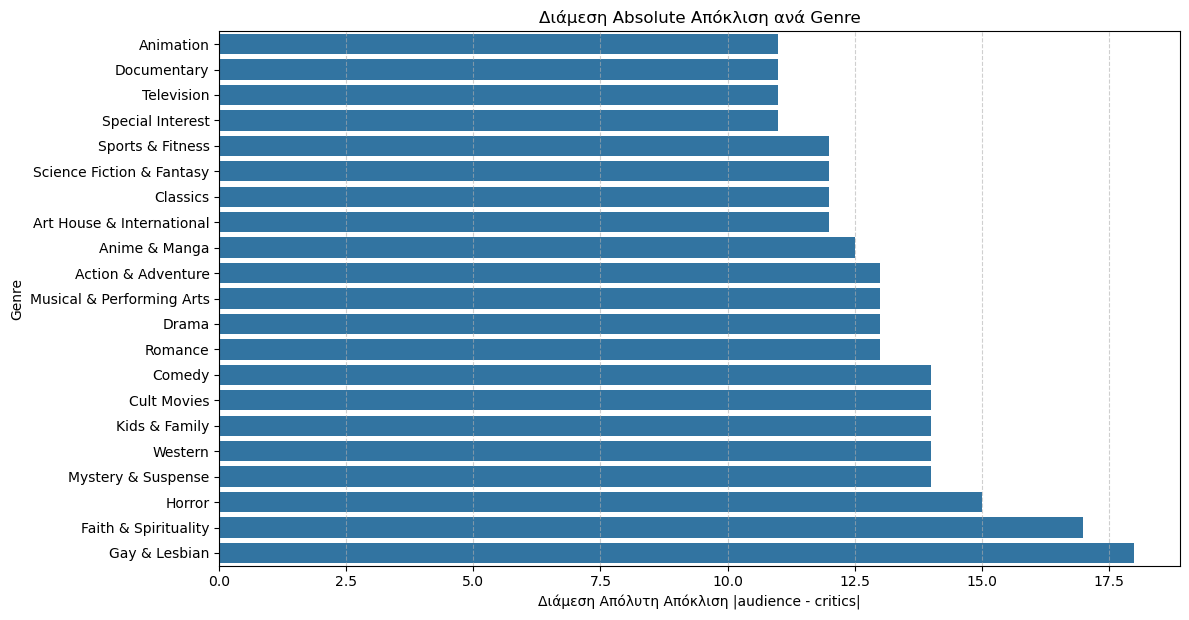

In [52]:
# Υπολογισμός διάμεσης absolute απόκλισης ανά genre
genre_abs_stats = {}
for g in genre_cols:
    genre_abs_stats[g] = df.loc[df[g] == 1, "divergence_abs"].median()

genre_abs_df = pd.DataFrame.from_dict(genre_abs_stats, orient="index", columns=["median_divergence_abs"])
genre_abs_df_sorted = genre_abs_df.sort_values("median_divergence_abs", ascending=True)

plt.figure(figsize=(12, max(6, 0.3 * len(genre_abs_df_sorted))))
sns.barplot(
    x=genre_abs_df_sorted["median_divergence_abs"],
    y=genre_abs_df_sorted.index,
    orient="h",
    
)
plt.xlabel("Διάμεση Απόλυτη Απόκλιση |audience - critics|")
plt.ylabel("Genre")
plt.title("Διάμεση Absolute Απόκλιση ανά Genre")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("genres_median_abs.png")
plt.show()


Saved: C:Desktop\figures\genres_mean_signed.png.png


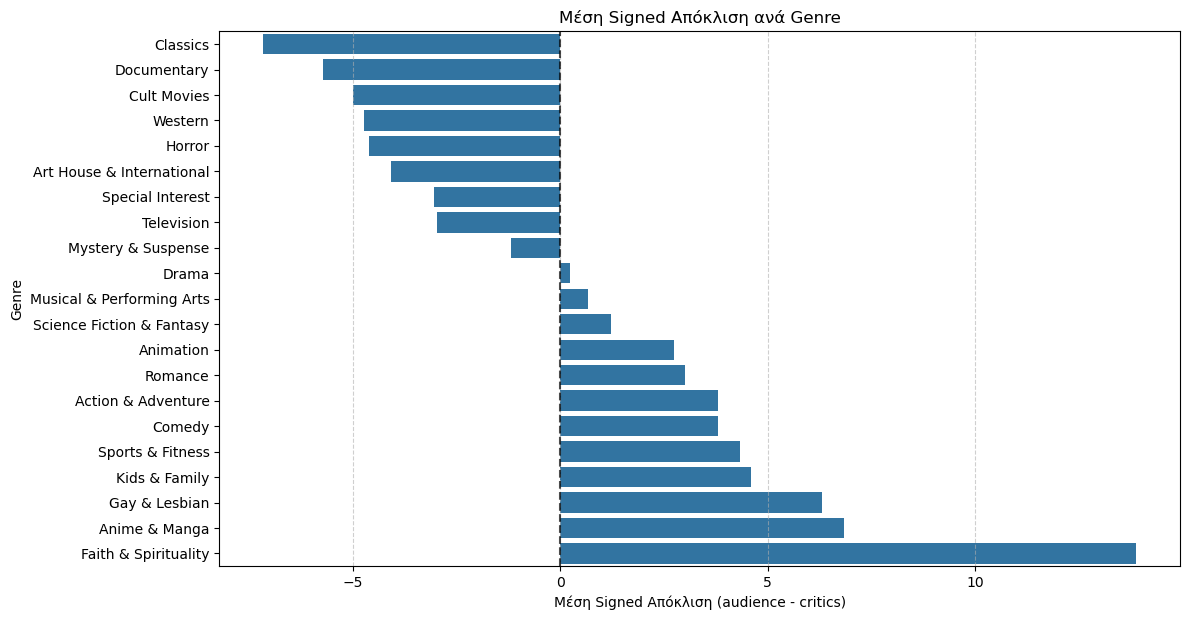

In [53]:
# Υπολογισμός μέσης signed απόκλισης ανά genre
genre_signed_stats = {}
for g in genre_cols:
    genre_signed_stats[g] = df.loc[df[g] == 1, "divergence_signed"].mean()

genre_signed_df = pd.DataFrame.from_dict(genre_signed_stats, orient="index", columns=["mean_divergence_signed"])
genre_signed_df_sorted = genre_signed_df.sort_values("mean_divergence_signed", ascending=True)

plt.figure(figsize=(12, max(6, 0.3 * len(genre_signed_df_sorted))))
sns.barplot(
    x=genre_signed_df_sorted["mean_divergence_signed"],
    y=genre_signed_df_sorted.index,
    orient="h",
    
)
plt.axvline(0, color="black", linestyle="--", alpha=0.7)
plt.xlabel("Μέση Signed Απόκλιση (audience - critics)")
plt.ylabel("Genre")
plt.title("Μέση Signed Απόκλιση ανά Genre")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
save_fig("genres_mean_signed.png")
plt.show()
